<a href="https://colab.research.google.com/github/abdullah-al-jamil/Emotion-Analysis/blob/main/emotion_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
try: 
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
keras = tf.keras

In [ ]:
import gensim, re
import numpy as np
import pandas as pd

In [ ]:
!wget https://raw.githubusercontent.com/abdullah-al-jamil/Emotion-and-Sentiment-Analysis/main/Emotion.csv -P "/content/drive/My Drive/app"

--2021-01-12 19:29:15--  https://raw.githubusercontent.com/abdullah-al-jamil/Emotion-and-Sentiment-Analysis/main/Emotion.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 389954 (381K) [text/plain]
Saving to: ‘/content/drive/My Drive/app/Emotion.csv.1’

Emotion.csv.1       100%[===================>] 380.81K  --.-KB/s    in 0.04s   

2021-01-12 19:29:15 (8.72 MB/s) - ‘/content/drive/My Drive/app/Emotion.csv.1’ saved [389954/389954]



In [ ]:
df = pd.read_csv('/content/drive/My Drive/app/Emotion.csv', sep=';')
df.head(5)

,id,text,emotion,lan,domain
0,2275,Hands down. You are good. I mean smart good.,joy,EN,funny_video
1,2283,Your are very good. keep it up,none,EN,funny_video
2,2292,Man!! I will never get used to these videos of...,surprise,EN,funny_video
3,2293,ডিসলাইক দেয়া 32,none,BN,funny_video
4,2298,ব্যাপক বিনোদন।,joy,BN,funny_video


In [ ]:
df1 = df[df.lan=='BN']
len(df1)

1006

In [ ]:
!wget https://raw.githubusercontent.com/abdullah-al-jamil/Emotion-and-Sentiment-Analysis/main/stop_words.txt -P "/content/drive/My Drive/app"
with open('/content/drive/My Drive/app/stop_words.txt', "r") as file1:
    stopwords = file1.read()

--2021-01-12 19:29:15--  https://raw.githubusercontent.com/abdullah-al-jamil/Emotion-and-Sentiment-Analysis/main/stop_words.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10442 (10K) [text/plain]
Saving to: ‘/content/drive/My Drive/app/stop_words.txt.1’

stop_words.txt.1    100%[===================>]  10.20K  --.-KB/s    in 0s      

2021-01-12 19:29:15 (97.3 MB/s) - ‘/content/drive/My Drive/app/stop_words.txt.1’ saved [10442/10442]



In [ ]:
def pre_process(sentence):
  #remove link
  sentence = re.sub(r'https?:\/\/.*[\r\n]*', '', sentence)
  sentence = re.sub(r'[^\u0980-\u09FF ]+', '', sentence)
  words = sentence.split()
  new_sentence = ''

  for word in words:
    if word not in stopwords:
      new_sentence += (word + " ")
  return new_sentence

sentences = []
temp_sentences = df1['text']

for i in temp_sentences:
  sentences.append(pre_process(i))

df1['text'] = sentences
df1.head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,id,text,emotion,lan,domain
3,2293,ডিসলাইক দেয়া,none,BN,funny_video
4,2298,ব্যাপক বিনোদন,joy,BN,funny_video
8,2312,খারাপ থাকলেই ঢুকে পরি চ্যানেলে,none,BN,funny_video
13,2421,কন্টেন্ট ক্রিয়েটর একটা প্রজেক্ট টাইম এফোর্ট এক...,disgust,BN,funny_video
14,2423,জাতি,none,BN,funny_video


In [ ]:
df1['emotion'] = np.where(df1['emotion']=='anger', 'disgust',  df1['emotion'])
df1['emotion'] = np.where(df1['emotion']=='fear', 'surprise',  df1['emotion'])
df1['emotion'] = np.where(df1['emotion']=='others', 'none',  df1['emotion'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
fisible = []
for sentence in sentences:
  if len(sentence.split())<=30:
    fisible.append(1)
  else:
    fisible.append(0)

df1['fisible'] = fisible
len(df1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1006

In [ ]:
df2 = df1[df1.fisible==1]
len(df1)

1006

In [ ]:
labels = []
for i in df2['emotion']:
  labels.append(i)

y = np.asarray(pd.get_dummies(labels))
pd.get_dummies(labels)


,disgust,joy,none,sad,surprise
0,0,0,1,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,1,0,0,0,0
4,0,0,1,0,0
...,...,...,...,...,...
965,1,0,0,0,0
966,1,0,0,0,0
967,1,0,0,0,0
968,1,0,0,0,0


In [ ]:
vocab_size = 1000
embedding_dim = 100
max_length = 30
trunc_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(df2.text)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(df2.text)
padded = pad_sequences(sequences,maxlen=max_length, padding='post')

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(y.shape[1], activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 100)           100000    
_________________________________________________________________
conv1d (Conv1D)              (None, 26, 128)           64128     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 325       
Total params: 172,709
Trainable params: 172,709
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(padded, y, test_size=0.2, shuffle=True)

In [ ]:
num_epochs = 8
history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_test, y_test))

Epoch 1/8
25/25 [==============================] - 1s 37ms/step - loss: 1.4977 - accuracy: 0.4195 - val_loss: 1.2778 - val_accuracy: 0.5567
Epoch 2/8
25/25 [==============================] - 0s 14ms/step - loss: 1.3002 - accuracy: 0.4839 - val_loss: 1.2525 - val_accuracy: 0.5567
Epoch 3/8
25/25 [==============================] - 0s 14ms/step - loss: 1.2836 - accuracy: 0.4875 - val_loss: 1.2348 - val_accuracy: 0.5567
Epoch 4/8
25/25 [==============================] - 0s 14ms/step - loss: 1.2406 - accuracy: 0.5085 - val_loss: 1.2075 - val_accuracy: 0.5567
Epoch 5/8
25/25 [==============================] - 0s 13ms/step - loss: 1.1495 - accuracy: 0.5112 - val_loss: 1.1915 - val_accuracy: 0.5619
Epoch 6/8
25/25 [==============================] - 0s 14ms/step - loss: 1.0819 - accuracy: 0.5019 - val_loss: 1.1710 - val_accuracy: 0.6031
Epoch 7/8
25/25 [==============================] - 0s 13ms/step - loss: 1.0284 - accuracy: 0.5676 - val_loss: 1.1629 - val_accuracy: 0.6134
Epoch 8/8
25/25 [===

In [ ]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 1.1953 - accuracy: 0.5928


[1.1953394412994385, 0.592783510684967]

In [ ]:
pred = model.predict(X_test)

for i in range(len(pred)):
  if pred[i][0]==pred[i].max():
    pred[i][0] = 1
    pred[i][1] = 0
    pred[i][2] = 0
    pred[i][3] = 0
    pred[i][4] = 0
    
  
  elif pred[i][1]==pred[i].max():
    pred[i][0] = 0
    pred[i][1] = 1
    pred[i][2] = 0
    pred[i][3] = 0
    pred[i][4] = 0

  elif pred[i][2]==pred[i].max():
    pred[i][0] = 0
    pred[i][1] = 0
    pred[i][2] = 1
    pred[i][3] = 0
    pred[i][4] = 0
  
  elif pred[i][3]==pred[i].max():
    pred[i][0] = 0
    pred[i][1] = 0
    pred[i][2] = 0
    pred[i][3] = 1
    pred[i][4] = 0

  else:
    pred[i][0] = 0
    pred[i][1] = 0
    pred[i][2] = 0
    pred[i][3] = 0
    pred[i][4] = 1

  
pred[0]

array([0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, pred, average='weighted')

0.5749111995658929

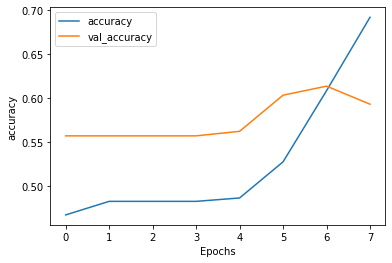

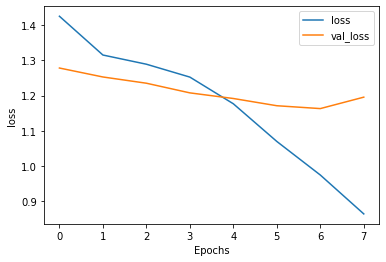

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')